# Data Modeling

## Step 1: Preparing the Data for Modeling
Before we start building the models, we need to prepare the data. This step involves:
- Separating the features (`X`) from the target variable (`y`).
- Splitting the data into **training** and **testing** sets. We’ll use **80% of the data for training** and **20% for testing** to assess model performance.



In [2]:
# Import necessary libraries
import pandas as pd

# Load the cleaned dataset again (ensure the path is correct)
data_path = r'C:\Users\Administrator\Desktop\Data Analytics\Portfolio project\New folder\Algerian_Forest_Fires_Classification\data\processed\cleaned_algerian_forest_fires.csv'
df = pd.read_csv(data_path)

# Display the first few rows to confirm the data is loaded
df.head()

from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['Classes'])
y = df['Classes']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape



((194, 14), (49, 14))

## Step 2: Training the Logistic Regression Model
In this step, we will train a **Logistic Regression** model as our **baseline model**. Logistic Regression is a simple linear model that is commonly used for binary classification problems like predicting whether a fire will occur or not.

We will:
- Initialize the model with default settings.
- Train the model using the training data.
- Make predictions on the test data to assess its performance.


In [3]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with increased iterations and solver set to 'liblinear'
log_reg = LogisticRegression(random_state=42, max_iter=200, solver='liblinear')

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)


## Step 3: Training the Random Forest Classifier Model
Next, we will train a **Random Forest Classifier**. This is a more complex model that can capture non-linear relationships between features, making it more powerful than Logistic Regression for certain datasets.

We will:
- Initialize the Random Forest model with default settings.
- Train the model using the training data.
- Make predictions on the test data to assess its performance.


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)


## Step 4: Evaluating the Models
Once both models (Logistic Regression and Random Forest Classifier) are trained, we will evaluate their performance on the test data using several classification metrics. These metrics will help us compare the models and assess their effectiveness in predicting fire occurrences.

The evaluation metrics will include:
- **Accuracy**: The proportion of correct predictions.
- **Precision**: The proportion of true positives among all positive predictions.
- **Recall**: The proportion of actual positives correctly identified by the model.
- **F1-Score**: The harmonic mean of precision and recall.
- **AUC-ROC**: The area under the receiver operating characteristic curve, which indicates the model's ability to distinguish between classes.


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, pos_label='fire')
log_reg_recall = recall_score(y_test, y_pred_log_reg, pos_label='fire')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, pos_label='fire')

# For AUC-ROC, we need predicted probabilities
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the 'fire' class
log_reg_auc = roc_auc_score(y_test, y_pred_log_reg_prob)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, pos_label='fire')
rf_recall = recall_score(y_test, y_pred_rf, pos_label='fire')
rf_f1 = f1_score(y_test, y_pred_rf, pos_label='fire')

# For AUC-ROC, we need predicted probabilities
y_pred_rf_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the 'fire' class
rf_auc = roc_auc_score(y_test, y_pred_rf_prob)

# Display evaluation metrics for both models
evaluation_results = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    "Logistic Regression": [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1, log_reg_auc],
    "Random Forest": [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc]
}

import pandas as pd
evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df


,Metric,Logistic Regression,Random Forest
0,Accuracy,0.959184,0.979592
1,Precision,0.962963,1.000000
2,Recall,0.962963,0.962963
3,F1-Score,0.962963,0.981132
4,AUC-ROC,0.998316,1.000000


## Step 5: Hyperparameter Tuning (Optional)
In this step, we will tune the hyperparameters for both the **Logistic Regression** and **Random Forest** models to optimize their performance. Hyperparameter tuning helps us find the best combination of parameters to improve model performance.

We will use **GridSearchCV** to search over a range of possible hyperparameters and find the optimal settings for each model.


### Hyperparameter Tuning for Logistic Regression

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the hyperparameter grid with increased max_iter for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'max_iter': [200, 300, 400]  # Increased number of iterations
}

# Step 3: Set up GridSearchCV for Logistic Regression
grid_search_log_reg = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), 
                                   log_reg_param_grid, cv=5, scoring='accuracy')

# Step 4: Fit GridSearchCV to the scaled training data
grid_search_log_reg.fit(X_train_scaled, y_train)

# Step 5: Get the best parameters and best score
best_log_reg_params = grid_search_log_reg.best_params_
best_log_reg_score = grid_search_log_reg.best_score_

best_log_reg_params, best_log_reg_score


({'C': 1, 'max_iter': 200, 'penalty': 'l2'}, 0.9742240215924426)

### Hyperparameter Tuning for Random Forest
 We ill tune the hyperparameters for the **Random Forest** model to improve its performance. We will use **GridSearchCV** to search over a range of hyperparameters and find the optimal settings for the Random Forest model.

We will tune the following hyperparameters:
- **`n_estimators`**: The number of trees in the forest.
- **`max_depth`**: The maximum depth of the trees.
- **`min_samples_split`**: The minimum number of samples required to split an internal node.

By finding the best combination of these hyperparameters, we can improve the model's accuracy.


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10]   # Minimum samples required to split a node
}

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score for Random Forest
best_rf_params = grid_search_rf.best_params_
best_rf_score = grid_search_rf.best_score_

# Display the best parameters and best score
best_rf_params, best_rf_score


({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
 0.9793522267206478)

## Step 6: Feature Importance (Random Forest)
Now that we have trained the models, we will analyze the **feature importance** for the **Random Forest model**. This will allow us to identify which features (weather conditions) are most important in predicting whether a fire will occur.

We will:
- Extract the feature importance scores from the trained Random Forest model.
- Visualize these feature importances to identify the most influential features.


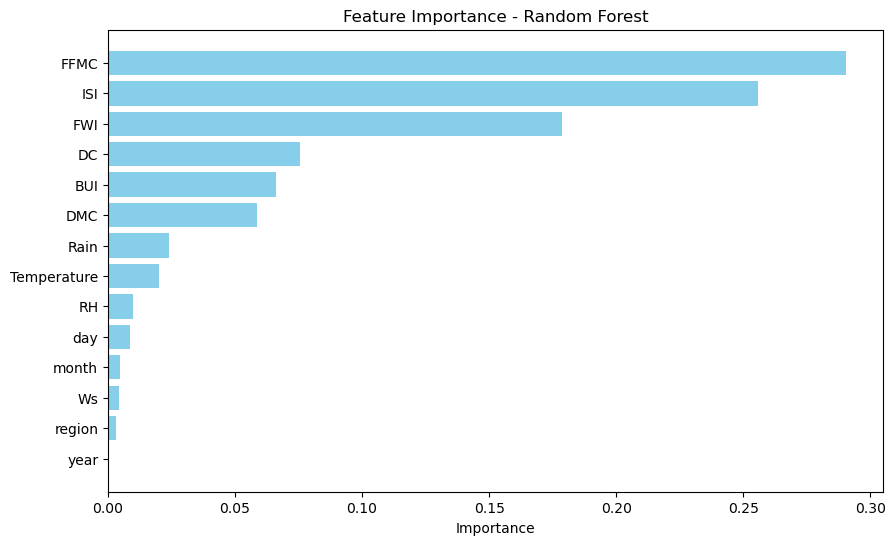

In [39]:
# Extract feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with features and their corresponding importance scores
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the importance DataFrame in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


## Step 7: Model Comparison
In this step, we will compare the performance of both models (**Logistic Regression** and **Random Forest**) based on the evaluation metrics we calculated earlier.

We will summarize the key metrics for both models in a **table** for easy comparison:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **AUC-ROC**

This comparison will help us identify which model performs better overall and which is more suitable for our task.


In [6]:
# Summary of evaluation results for both models
evaluation_results = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    "Logistic Regression": [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1, log_reg_auc],
    "Random Forest": [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc]
}

# Create a DataFrame for easier comparison
evaluation_df = pd.DataFrame(evaluation_results)

# Display the table
evaluation_df


NameError: name 'log_reg_accuracy' is not defined

## Step 8: Error Analysis
After evaluating the models, it's important to conduct **error analysis**. This helps us understand where the models are making mistakes, particularly for **misclassified samples**. We will analyze the **false positives** and **false negatives** to gain insights into how each model can be improved.

In this analysis, we will:
- Identify **misclassified samples** (both false positives and false negatives).
- Investigate the characteristics of these samples to understand where the models might be failing.


In [44]:
# Identify misclassified samples for Logistic Regression
misclassified_log_reg = X_test[y_test != y_pred_log_reg]
misclassified_rf = X_test[y_test != y_pred_rf]

# Display the misclassified samples for both models
misclassified_log_reg, misclassified_rf


(     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI  \
 209   28      8  2012           35  56  14   0.4  79.2  37.0  166.0  2.1   
 96     5      9  2012           29  75  16   0.0  80.8   3.4   24.0  2.8   
 
       BUI  FWI  region  
 209  30.6  6.1       1  
 96    5.1  1.7       0  ,
     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
 96    5      9  2012           29  75  16   0.0  80.8  3.4  24.0  2.8  5.1   
 
     FWI  region  
 96  1.7       0  )

## Step 9: Model Interpretation
In this step, we will interpret the behavior of both models:
- For **Logistic Regression**, we'll examine the **coefficients** to understand the effect of each feature on the prediction.
- For **Random Forest**, we have already analyzed the **feature importance**, but we can now look at specific decisions made by the model to better understand which features are critical for its predictions.

Understanding how each model makes predictions helps us gain insights into the relationship between the features and the target variable.


In [42]:
# Get coefficients for Logistic Regression
log_reg_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]  # Coefficients for the features
})

# Sort coefficients by absolute value
log_reg_coefficients['Absolute Coefficient'] = log_reg_coefficients['Coefficient'].abs()
log_reg_coefficients = log_reg_coefficients.sort_values(by='Absolute Coefficient', ascending=False)

log_reg_coefficients


,Feature,Coefficient,Absolute Coefficient
7,FFMC,-1.525434,1.525434
6,Rain,-0.769906,0.769906
12,FWI,-0.713766,0.713766
10,ISI,-0.612979,0.612979
13,region,-0.360292,0.360292
11,BUI,0.324837,0.324837
1,month,0.296376,0.296376
3,Temperature,0.229419,0.229419
5,Ws,-0.131111,0.131111
9,DC,-0.090837,0.090837


### Logistic Regression Coefficients Interpretation

In this step, we examine the coefficients of the **Logistic Regression** model to understand the influence of each feature on the prediction. The coefficients tell us how much a feature contributes to the log-odds of predicting **fire**:

- **Positive Coefficient**: As the feature value increases, the likelihood of predicting **fire** increases.
- **Negative Coefficient**: As the feature value increases, the likelihood of predicting **fire** decreases.

#### Key Features:
- **FFMC** (Fine Fuel Moisture Code) has the most significant effect on predictions, with a large negative coefficient. This suggests that drier conditions (high FFMC) are less likely to result in a fire.
- **FWI**, **Rain**, and **ISI** also show strong negative relationships with fire occurrence.
- **BUI** (Buildup Index) has a positive relationship with fire occurrence, meaning more buildup increases the likelihood of a fire.
- Features like **Temperature**, **month**, and **year** have a smaller but positive impact on fire predictions.

This insight helps us understand how different weather conditions are influencing the prediction of forest fires.


In [ ]:
import joblib

# Save Logistic Regression Model
joblib.dump(log_reg, 'models/log_reg_model.pkl')

# Save Random Forest Model
joblib.dump(rf_classifier, 'models/random_forest_model.pkl')

# Optionally, you can print out confirmation of the save
print("Models saved successfully!")


# Model Saving

In this section, we will save our trained models so that we can use them later for predictions without needing to retrain them. We will store the models in the `models/` folder.


In [6]:
import joblib
import os

# Create the models folder if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save Logistic Regression Model
joblib.dump(log_reg, 'models/log_reg_model.pkl')

# Save Random Forest Model
joblib.dump(rf_classifier, 'models/random_forest_model.pkl')

# Confirm that models are saved
print("Models saved successfully!")


Models saved successfully!


# Model Loading

Now that our models are saved, we can load them whenever needed. In this section, we will demonstrate how to load the saved models for predictions or further analysis.


In [8]:
# Load Logistic Regression Model
log_reg_loaded = joblib.load('models/log_reg_model.pkl')

# Load Random Forest Model
rf_loaded = joblib.load('models/random_forest_model.pkl')

# Confirm that models are loaded
print("Models loaded successfully!")


Models loaded successfully!


# Making Predictions with Loaded Models

After loading the models, we can use them to make predictions on our test data. Below, we demonstrate how to use both the Logistic Regression and Random Forest models for predictions.


In [13]:
# Make predictions using the Logistic Regression model
y_pred_log_reg = log_reg_loaded.predict(X_test)

# Make predictions using the Random Forest model
y_pred_rf = rf_loaded.predict(X_test)

# Evaluate models' accuracy
from sklearn.metrics import accuracy_score
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Logistic Regression Accuracy: 0.9592
Random Forest Accuracy: 0.9796


In [14]:
import joblib
import os

# Ensure models directory exists
os.makedirs('models', exist_ok=True)

# Check if the models are trained
if 'log_reg' in locals() and 'rf_classifier' in locals():
    # Save models
    joblib.dump(log_reg, 'models/log_reg_model.pkl')
    joblib.dump(rf_classifier, 'models/random_forest_model.pkl')
    print("Models have been saved successfully!")

    # Verify files are saved
    print("Files in models directory:", os.listdir('models/'))
else:
    print("Models are not trained yet.")


Models have been saved successfully!
Files in models directory: ['log_reg_model.pkl', 'random_forest_model.pkl']
